Conjunto de dados fictício que contém as preferências de estilos musicais em diferentes regiões do país

In [2]:
import pandas as pd
import numpy as np

# Definindo a semente para garantir resultados reproduzíveis
np.random.seed(123)

# Criando o conjunto de dados fictício
estilos_musicais = ["Rock", "Pop", "Eletrônica", "Funk", "Sertanejo"]
regioes = ["Centro-Oeste", "Nordeste", "Norte", "Sudeste", "Sul"]

# Gerando 500 amostras para cada variável
dados = pd.DataFrame({
    'Estilo_Musical': np.random.choice(estilos_musicais, 500, replace=True),
    'Regiao': np.random.choice(regioes, 500, replace=True)
})

dados.head()

,Estilo_Musical,Regiao
0,Eletrônica,Sul
1,Sertanejo,Norte
2,Eletrônica,Nordeste
3,Pop,Sudeste
4,Funk,Nordeste


In [3]:
tab_musical_regiao = pd.crosstab(dados['Estilo_Musical'], dados['Regiao'])

tab_musical_regiao 

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Estilo_Musical,,,,,
Eletrônica,22,14,15,21,21
Funk,27,24,12,26,15
Pop,19,25,20,26,18
Rock,22,23,17,22,15
Sertanejo,14,12,22,25,23


Com isso, temos a tabela com os 500 registros divididos pelo número de ocorrência entre estilos musicais e a região onde a pessoa entrevistada mora. Vamos agora criar as diferentes tabelas cruzadas para comparar resultados entre regiões, entre estilos musicais e levando os dois casos em conta.


In [4]:
tab_musical_regiao = round(pd.crosstab(dados['Estilo_Musical'], dados['Regiao'], normalize = 'index') * 100,1)
tab_musical_regiao

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Estilo_Musical,,,,,
Eletrônica,23.7,15.1,16.1,22.6,22.6
Funk,26.0,23.1,11.5,25.0,14.4
Pop,17.6,23.1,18.5,24.1,16.7
Rock,22.2,23.2,17.2,22.2,15.2
Sertanejo,14.6,12.5,22.9,26.0,24.0


 o cálculo das frequências relativas por linha, onde a soma de todas as regiões por estilo musical será responsável por 100%. Neste caso, por exemplo, podemos comparar onde o estilo Pop é mais ouvido.
 

In [5]:
tab_musical_regiao = round(pd.crosstab(dados['Estilo_Musical'], dados['Regiao'], normalize = 'all') * 100,1)
tab_musical_regiao

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Estilo_Musical,,,,,
Eletrônica,4.4,2.8,3.0,4.2,4.2
Funk,5.4,4.8,2.4,5.2,3.0
Pop,3.8,5.0,4.0,5.2,3.6
Rock,4.4,4.6,3.4,4.4,3.0
Sertanejo,2.8,2.4,4.4,5.0,4.6


Por fim, vamos comparamos todos os estilos musicais em relação às regiões. Para isso, faremos o cálculo das frequências relativas por todos os registros, onde a soma de todas as comparações será responsável por 100%. Neste caso, por exemplo, podemos entender o peso da música Pop na Região Nordeste frente a todas as outras em todas as regiões.


----------


# Distribuição de frequência de dados quantitativos



In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Vamos começar lendo os dados e criando as classes de acordo com o salário mínimo na época da pesquisa. Vamos passar também para as classes os valores mínimos e máximos de remuneração que serão importantes para dividir as classes utilizando a função cut.

In [20]:
# Carregar os dados
url = "https://raw.githubusercontent.com/alura-cursos/estatistica-r-frequencias-medidas/refs/heads/main/dados/colaboradores.csv"
colaboradores = pd.read_csv(url)

In [21]:
# Definindo o salário mínimo e classes
sm = 1412

In [22]:
# Definindo as classes salariais com base no salário mínimo
classes = [colaboradores['remuneracao'].min(), sm * 2, sm * 4, sm * 8, sm * 12, colaboradores['remuneracao'].max()]

classes

[np.float64(1920.57), 2824, 5648, 11296, 16944, np.float64(32084.55)]

Agora, que definimos as classes em um vetor, vamos criar uma coluna que salva as faixas para cada remuneração dentro da base de dados. Para isso, utilizaremos a mesma função cut que utilizamos no vídeo anterior, mas dessa vez vamos passar o nome da classe (A até E) ao invés do intervalo da faixa para o valor da coluna.

In [23]:
# Definindo as classes salariais com base nas faixas
labels = ['E', 'D', 'C', 'B', 'A']
colaboradores['faixa_salarial'] = pd.cut(colaboradores['remuneracao'], bins=classes, labels=labels, right=True, include_lowest=True)

colaboradores

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao,faixa_salarial
0,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79,A
1,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07,A
2,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61,A
3,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60,A
4,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55,A
...,...,...,...,...,...,...,...,...
11085,REP011086,Nicolas Mendes,Masculino,40,Repositor(a),Bom,3340.72,D
11086,REP011087,Maria Luísa Câmara,Feminino,48,Repositor(a),Insuficiente,3330.98,D
11087,REP011088,Allana da Mota,Feminino,28,Repositor(a),Excelente,3382.03,D
11088,REP011089,Bruno Rezende,Masculino,36,Repositor(a),Bom,3088.46,D


Agora, vamos agrupar os dados por classe e criar a distribuição de frequência absoluta e relativa, atualizando a variável classes_salariais.

In [25]:
frequencias = colaboradores['faixa_salarial'].value_counts().sort_index()
frequencias

faixa_salarial
E     948
D    8070
C    1944
B      93
A      35
Name: count, dtype: int64

In [26]:
classes_salariais = colaboradores.groupby('faixa_salarial', observed=False).size().reset_index(name='frequencia')
classes_salariais['porcentagem'] = classes_salariais['frequencia'] / len(colaboradores) * 100
classes_salariais = classes_salariais.sort_values(by='faixa_salarial')
classes_salariais


,faixa_salarial,frequencia,porcentagem
0,E,948,8.548242
1,D,8070,72.768260
2,C,1944,17.529306
3,B,93,0.838593
4,A,35,0.315600


O trecho de código acima apresentado tem como objetivo calcular e exibir a distribuição de frequência absoluta e relativa das faixas salariais dos colaboradores, utilizando o pandas em Python.

Primeiro, o método groupby é utilizado para agrupar o DataFrame colaboradores pela coluna 'faixa_salarial'. O parâmetro observed=False garante que todas as categorias possíveis sejam consideradas, mesmo que algumas não estejam presentes nos dados. Em seguida, o método size() conta quantos colaboradores pertencem a cada faixa salarial, retornando uma série com a frequência absoluta de cada grupo. O método reset_index(name='frequencia') transforma essa série em um novo DataFrame chamado classes_salariais, onde cada linha representa uma faixa salarial e sua respectiva frequência.

Na sequência, é criada uma nova coluna chamada 'porcentagem', que representa a frequência relativa de cada faixa salarial em relação ao total de colaboradores. Esse cálculo é feito dividindo a frequência absoluta de cada faixa pelo total de colaboradores (len(colaboradores)) e multiplicando por 100 para obter o valor em percentual.

Por fim, o DataFrame é ordenado pela coluna 'faixa_salarial' para garantir que as faixas apareçam em ordem crescente, facilitando a visualização e interpretação dos dados. O resultado final é exibido, mostrando para cada faixa salarial a quantidade de colaboradores e a porcentagem correspondente, o que auxilia na análise da distribuição salarial dentro da empresa.

Agora que já conseguimos construir a tabela de frequências, vamos visualizar a distribuição em um gráfico de barras:


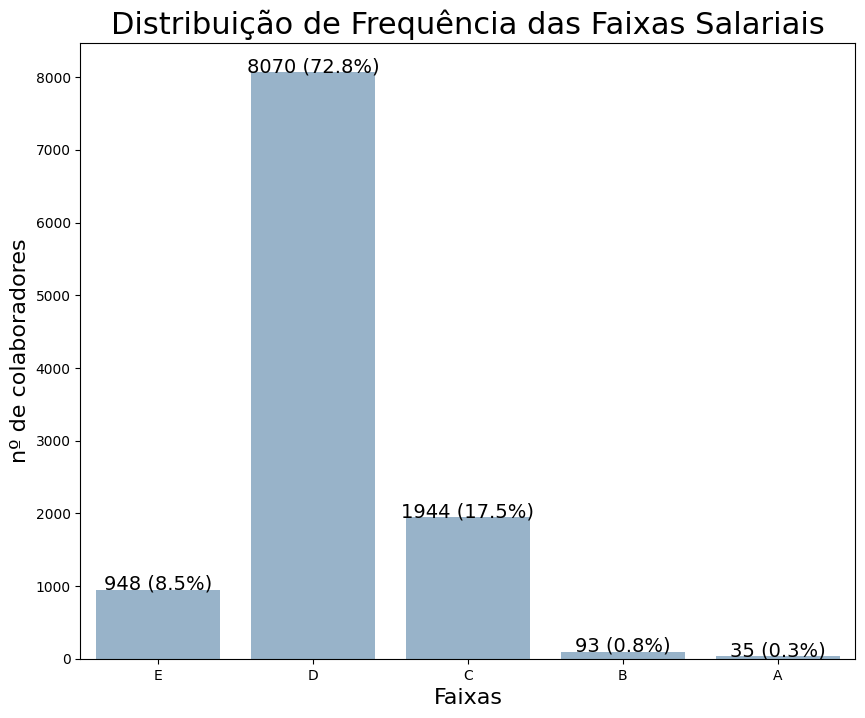

In [29]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criando o gráfico de barras
sns.barplot(x='faixa_salarial', y='frequencia', data=classes_salariais, color='steelblue', alpha=0.6,)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Frequência das Faixas Salariais', fontsize=22, ha='center')
plt.xlabel('Faixas', fontsize=16)
plt.ylabel('nº de colaboradores', fontsize=16)

# Adicionando rótulos de frequência e porcentagem acima das barras
for i, row in classes_salariais.iterrows():
    plt.text(i, row['frequencia'] + 2, f"{row['frequencia']} ({round(row['porcentagem'], 1)}%)",
             ha='center', fontsize=14)

# Exibindo o gráfico
plt.show()